<a href="https://colab.research.google.com/github/derrickny/BI-Project/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### LOADING THE NECESSARY LIBRARIES

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from bs4 import BeautifulSoup
import re, string, unicodedata
from keras.preprocessing import text, sequence
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout
from keras.callbacks import ReduceLROnPlateau
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Here we are carrying out combination of datasets politifact_factcheck_data.csv and factcheck_data.csv

In [4]:

# Load the first dataset
# df1 = pd.read_csv('data/politifact_factcheck_data.csv')

# Load the second dataset
# df2 = pd.read_csv('data/factcheck_data.csv')

# Combine the two datasets
# combined_df = pd.concat([df1, df2], ignore_index=True)

# Save the combined dataset to a new CSV file
# Read the combined dataset
combined_df=pd.read_csv('/content/drive/MyDrive/data/combined_data.csv')


In [5]:
combined_df.head()

statement  verdict
0  John McCain opposed bankruptcy protections for...        1
1  "Bennie Thompson actively cheer-led riots in t...        0
2  Says Maggie Hassan was "out of state on 30 day...        1
3  "BUSTED: CDC Inflated COVID Numbers, Accused o...        0
4  "I'm the only (Republican) candidate that has ...        1

**WHAT ARE STOPWORDS?**

Stopwords are commonly used words in a language that are often filtered out from text data because they are considered to be of little value in terms of conveying meaningful information. These words are frequently used for grammatical purposes, such as forming sentence structures, but they don't carry significant content or meaning on their own.

Examples of stopwords in English include words like "the," "and," "is," "in," "of," etc. The choice of stopwords may vary depending on the context and the specific application.

When working with natural language processing (NLP) tasks like text analysis, sentiment analysis, or information retrieval, it's common to remove stopwords from the text to focus on the more meaningful words that can help in understanding the content and extracting valuable insights.

In various programming libraries and frameworks, including NLTK (Natural Language Toolkit) for Python, there are predefined lists of stopwords for different languages that can be used for text preprocessing. Removing stopwords is a standard step in the text data cleaning process to improve the efficiency of subsequent analysis or modeling.

**DATA CLEANING**

In [6]:
 #Define a set of stopwords
stop = set(stopwords.words('english'))

def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

# Define a function to remove text before sentences
def remove_text_before_sentences(text):
    # Use regular expression to match and remove the text before the first sentence
    text = re.sub(r'^[A-Z]+\s*-\s*', '', text)

    return text

# Define a function to remove words within parentheses and the parentheses themselves
def remove_words_in_parentheses(text):
    return re.sub(r'\([^)]*\)', '', text)

# Define a function to remove dashes
def remove_dashes(text):
    return text.replace('-', '')

# Define a function to remove unwanted symbols and special characters
def remove_symbols(text):
    # Define a regular expression pattern to match symbols and special characters
    pattern = r'[^A-Za-z0-9\s]'
    return re.sub(pattern, '', text)

# Define a function to denoise the text
def denoise_text(text):
    text = strip_html(text)
    text = remove_text_before_sentences(text)
    text = remove_words_in_parentheses(text)
    text = remove_dashes(text)
    text = remove_symbols(text)
    text = ' '.join([word for word in text.split() if word.lower() not in stop])
    return text

# Convert the 'statement' column to strings
combined_df['statement'] = combined_df['statement'].astype(str)

# Apply the denoise_text function to the 'statement' column in your DataFrame
combined_df['statement'] = combined_df['statement'].apply(denoise_text)


<ipython-input-6-d73b45311f15>:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [7]:
#combined_df.head(100)

# #read the combined dataset thats been cleaned
# combined_df = pd.read_csv('/content/drive/MyDrive/data/combined_cleaned_data.csv')


In [8]:
combined_df.head()

statement  verdict
0  John McCain opposed bankruptcy protections fam...        1
1        Bennie Thompson actively cheerled riots 90s        0
2  Says Maggie Hassan state 30 days last three mo...        1
3  BUSTED CDC Inflated COVID Numbers Accused Viol...        0
4      Im candidate actually reduced size government        1

In [18]:
import pandas as pd
from scipy import stats
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(combined_df['statement'], combined_df['verdict'])

# Perform chi-square test
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

# Print results
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("There is a significant association between 'statement' and 'verdict'.")
else:
    print("There is no significant association between 'statement' and 'verdict'.")

Chi-Square Statistic: 66047.99095426872
P-value: 3.620383920628051e-60
There is a significant association between 'statement' and 'verdict'.


The output indicates that the chi-square test has found a significant association between the 'statement' and 'verdict' variables.

Chi-Square Statistic: 66047.99095426872
P-value: 3.620383920628051e-60
Here's how you can interpret these results:

Chi-Square Statistic: This value is a measure of the difference between the expected and observed frequencies in the contingency table. In this case, the high value suggests a significant difference.
P-value: The p-value is extremely low (close to zero), indicating strong evidence against the null hypothesis. In hypothesis testing, a low p-value suggests that you can reject the null hypothesis. Here, the null hypothesis would be that there is no association between 'statement' and 'verdict'.
Conclusion: Since the p-value is below a typical significance level (e.g., 0.05), you would reject the null hypothesis. Therefore, based on the chi-square test, there is a significant association between the 'statement' and 'verdict'. This implies that the distribution of 'verdict' is not independent of 'statement', and there is a relationship between the two variables.

Hence i opted to go with statement and Verdict in building my model

In [9]:
# Measures of Frequency
# Count of each category in the 'verdict' column
frequency_counts = combined_df['verdict'].value_counts()
print("Measures of Frequency:")
print(frequency_counts)
print("\n")

# Measures of Central Tendency
mean_value = combined_df['verdict'].mean()
median_value = combined_df['verdict'].median()
mode_value = combined_df['verdict'].mode()[0]
print("Measures of Central Tendency:")
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Mode: {mode_value}")
print("\n")

# Measures of Distribution
std_deviation = combined_df['verdict'].std()
variance = combined_df['verdict'].var()
range_value = combined_df['verdict'].max() - combined_df['verdict'].min()
print("Measures of Distribution:")
print(f"Standard Deviation: {std_deviation}")
print(f"Variance: {variance}")
print(f"Range: {range_value}")
print("\n")

Measures of Frequency:
0    35241
1    30809
Name: verdict, dtype: int64


Measures of Central Tendency:
Mean: 0.46644965934897803
Median: 0.0
Mode: 0


Measures of Distribution:
Standard Deviation: 0.4988768812729094
Variance: 0.24887814266858457
Range: 1




1-True, 0- False
###  Measures of Frequency:
* 0: 35,241 occurrences
* 1: 30,809 occurrences
The 'verdict' variable has two categories: 0 and 1. There are 35,241 instances of category 0 and 30,809 instances of category 1.

### Measures of Central Tendency:
* Mean (Average): 0.4664
* Median (Middle Value): 0.0
* Mode (Most Frequent Value): 0
#### Interpretation:
* The mean of 0.4664 suggests that, on average, the 'verdict' tends to be closer to 0.
* The median of 0.0 indicates that 50% of the data points have a 'verdict' of 0 or lower.
* The mode being 0 signifies that category 0 is the most frequently occurring category.
###Measures of Distribution:
* Standard Deviation: 0.4989
* Variance: 0.2489
* Range: 1
### Interpretation:
* The standard deviation of 0.4989 indicates the amount of variation or dispersion in the 'verdict' values. A higher standard deviation suggests greater variability.
* The variance of 0.2489 is the square of the standard deviation and provides another measure of the spread of 'verdict'.
* The range of 1 indicates that the 'verdict' values span a range from 0 to 1.

These measures collectively provide insights into the distribution, central tendency, and variability of the 'verdict' variable in your dataset.

**WORDCLOUD FOR TRUE STATEMENT (LABEL - 1)**

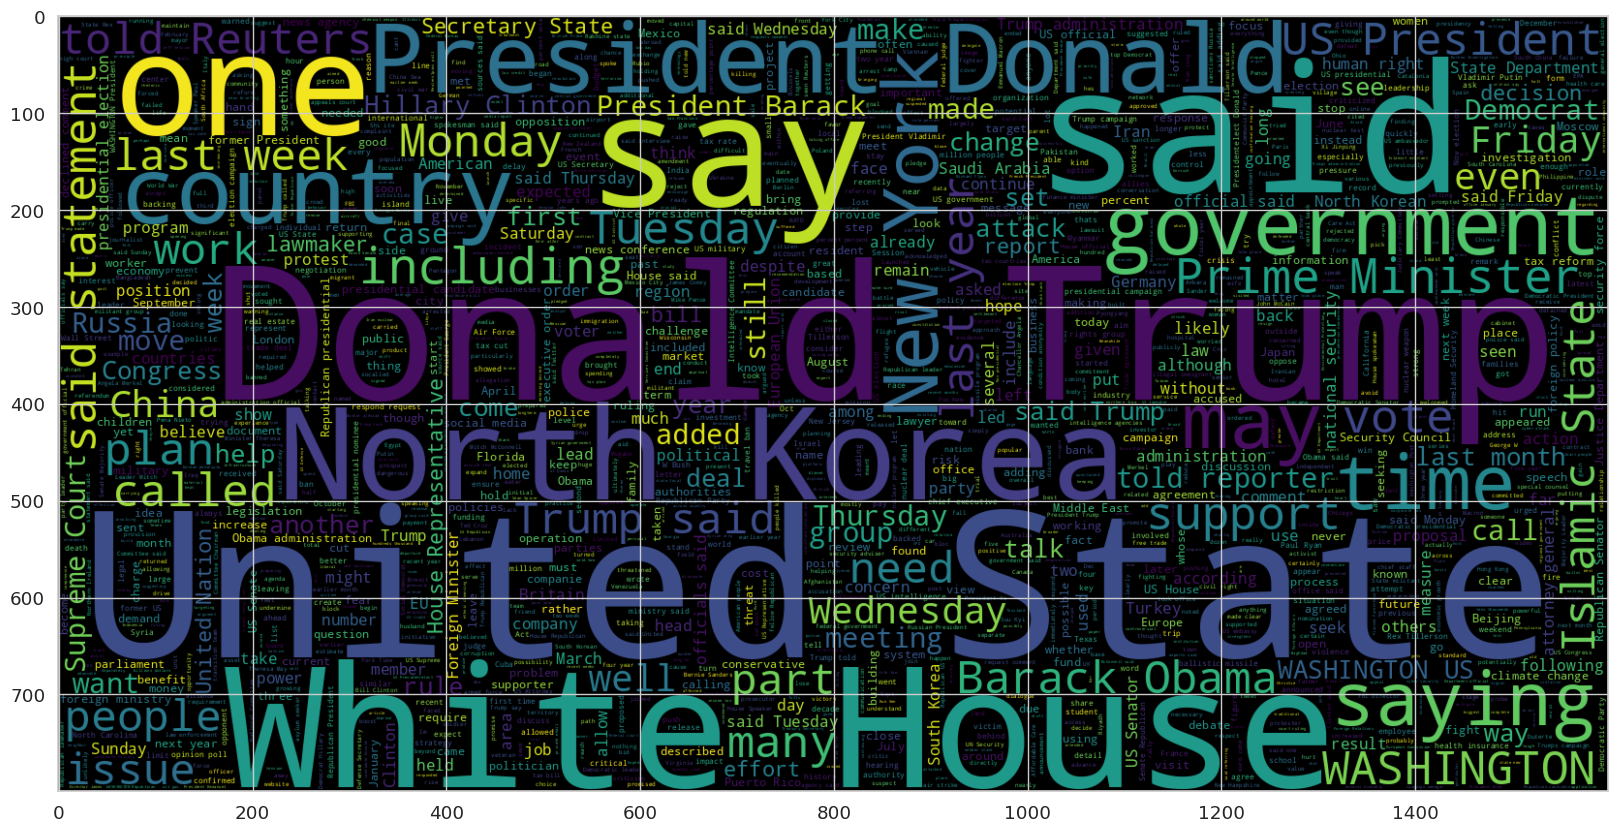

In [ ]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(combined_df[combined_df.verdict == 1].statement))
plt.imshow(wc , interpolation = 'bilinear')

**WORDCLOUD FOR FALSE STATEMENT (LABEL - 0)**

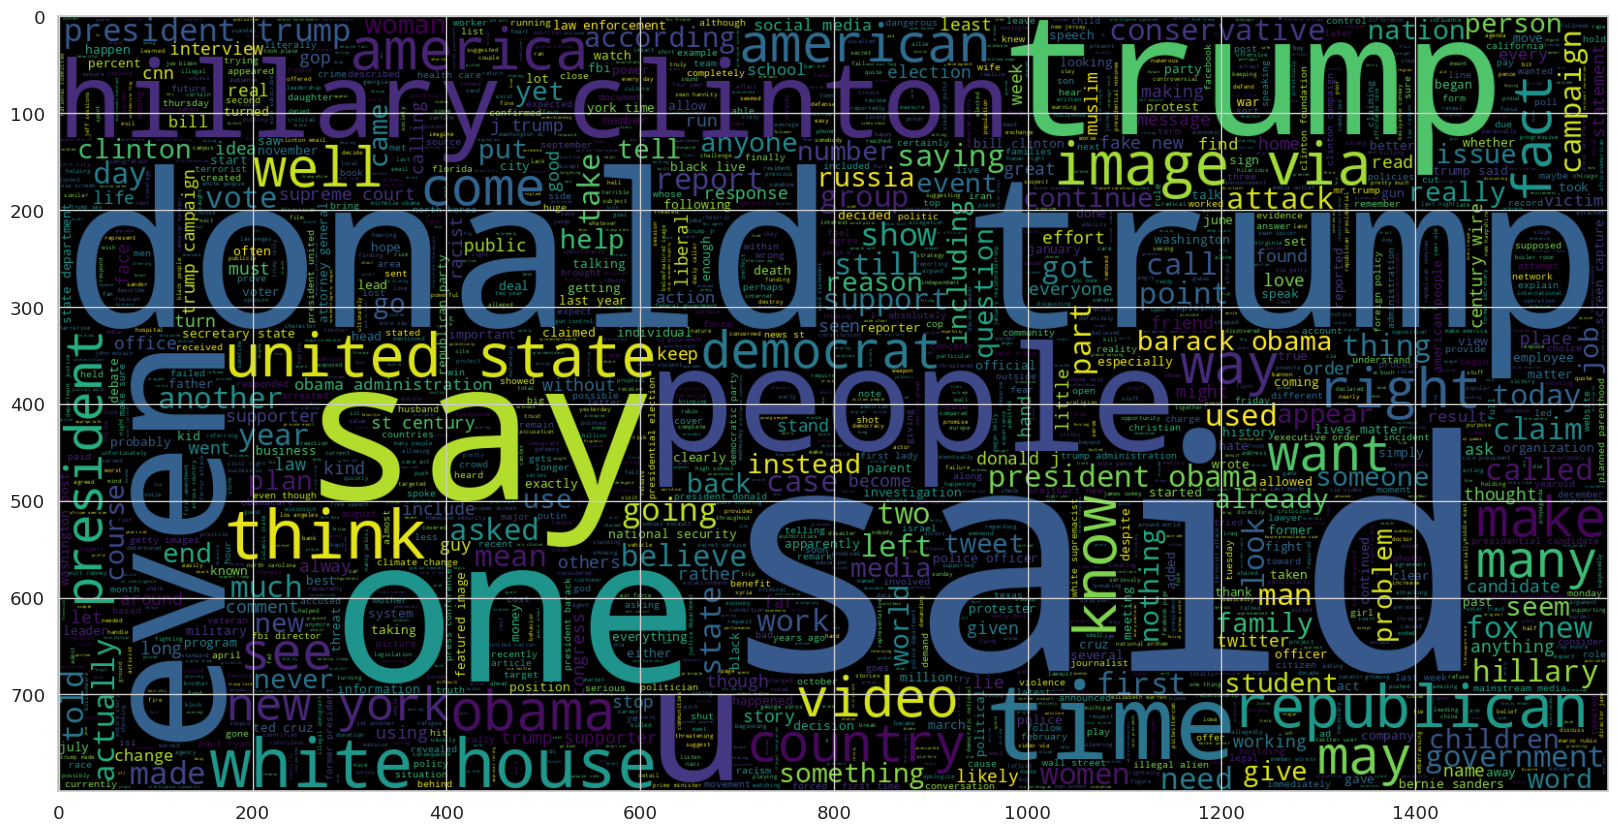

In [ ]:
# Preprocess the text data
combined_df['statement'] = combined_df['statement'].apply(lambda x: re.sub(r'[^a-zA-Z]', ' ', str(x).lower()))

# Generate the WordCloud
plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=2000, width=1600, height=800, stopwords=STOPWORDS).generate(" ".join(combined_df[combined_df.verdict == 0].statement))
plt.imshow(wc, interpolation='bilinear')


**Number of characters in texts**

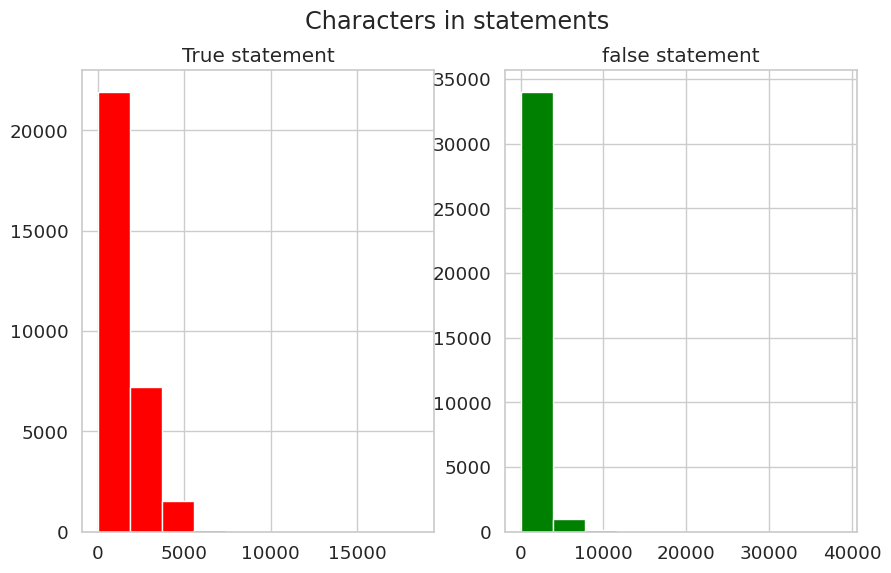

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,6))
text_len=combined_df[combined_df['verdict']==1]['statement'].str.len()
ax1.hist(text_len,color='red')
ax1.set_title('True statement')
text_len=combined_df[combined_df['verdict']==0]['statement'].str.len()
ax2.hist(text_len,color='green')
ax2.set_title('false statement')
fig.suptitle('Characters in statements')
plt.show()

**The distribution of both seems to be a bit different.Around 23000 characters in true and 34000 in false.**

**Number of words in each text**

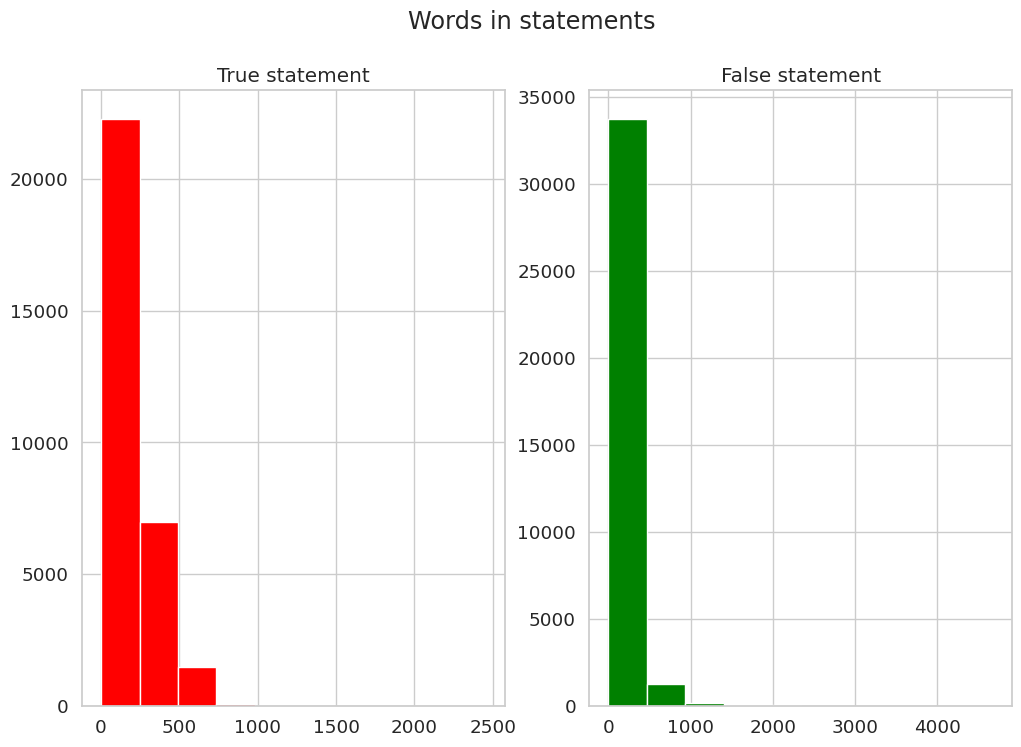

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=combined_df[combined_df['verdict']==1]['statement'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='red')
ax1.set_title('True statement')
text_len=combined_df[combined_df['verdict']==0]['statement'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='green')
ax2.set_title('False statement')
fig.suptitle('Words in statements')
plt.show()

**Average word length in a text**

<ipython-input-25-e8fa5612d003>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
<ipython-input-25-e8fa5612d003>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level f

Text(0.5, 0.98, 'Average word length in each statement')

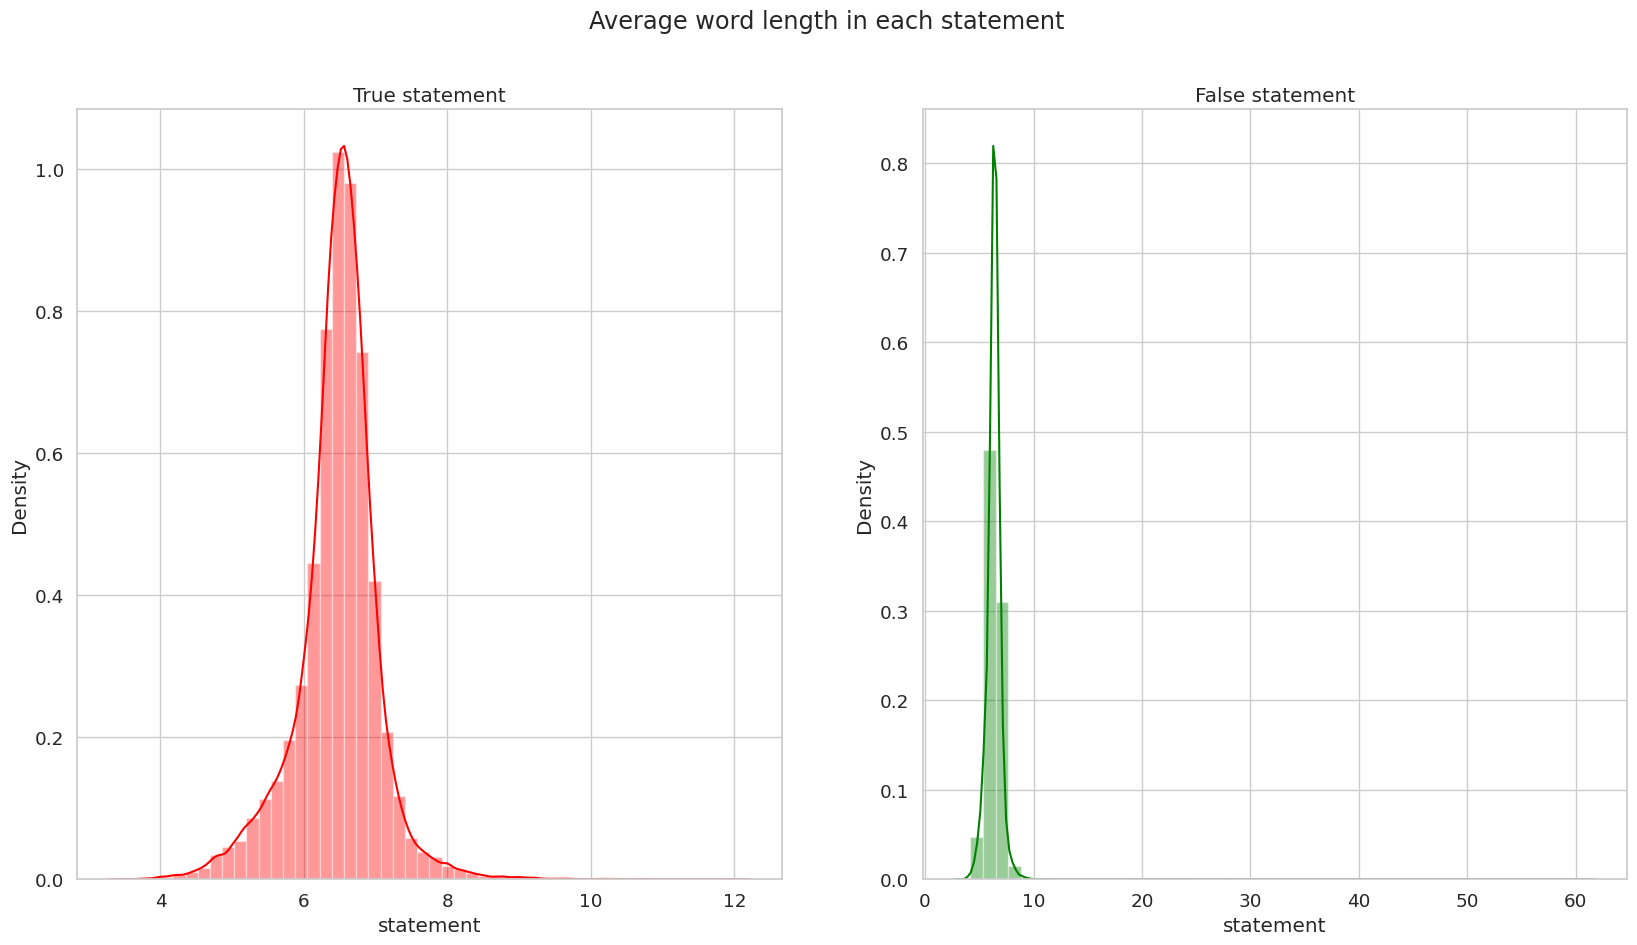

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
word=combined_df[combined_df['verdict']==1]['statement'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('True statement')
word=combined_df[combined_df['verdict']==0]['statement'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('False statement')
fig.suptitle('Average word length in each statement')

In [ ]:
def get_corpus(statement):
    words = []
    for i in statement:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(combined_df.statement)
corpus[:5]

['john', 'mccain', 'opposed', 'bankruptcy', 'protections']

In [ ]:
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common

{'said': 131021,
 'trump': 128867,
 'us': 68984,
 'would': 56157,
 'president': 53725,
 'people': 42908,
 'one': 36968,
 'new': 33477,
 'state': 33458,
 'also': 31186}

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

**Unigram Analysis**

<Axes: >

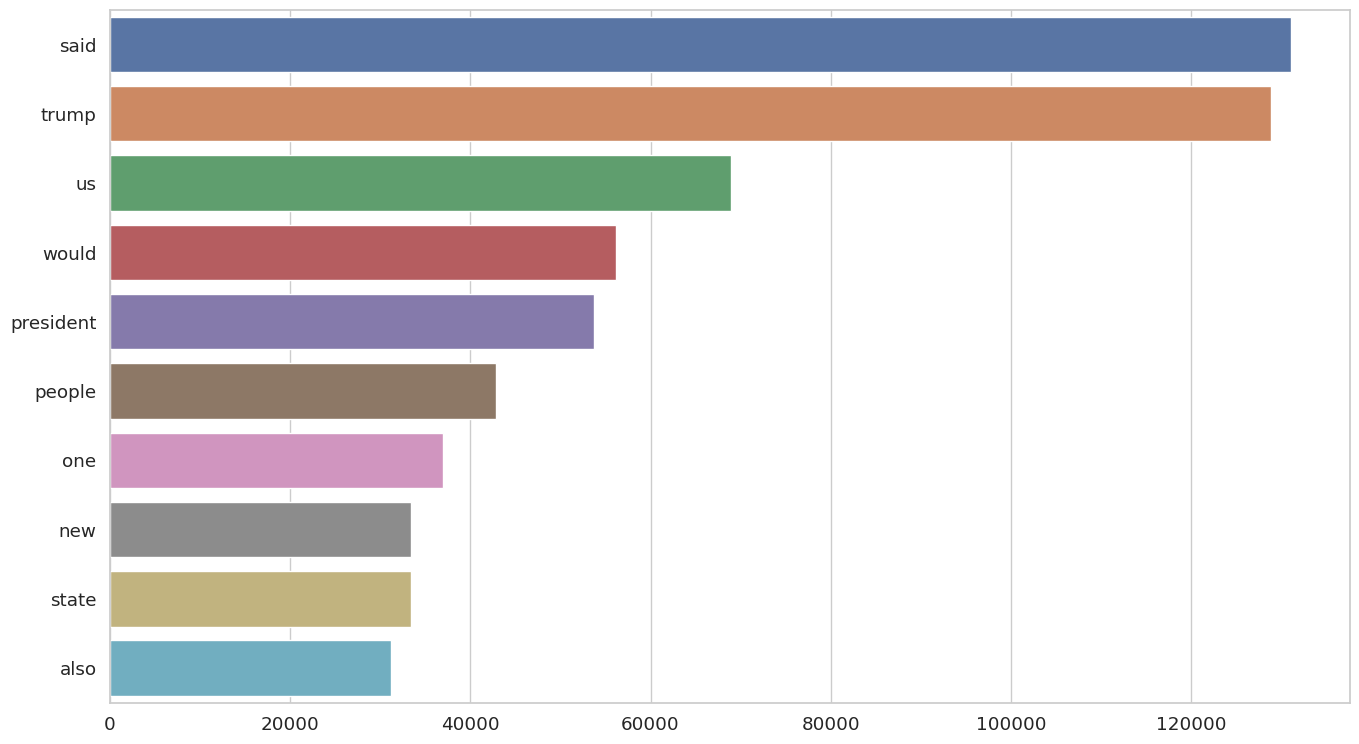

In [ ]:
plt.figure(figsize = (16,9))
most_common_uni = get_top_text_ngrams(combined_df.statement,10,1)
most_common_uni = dict(most_common_uni)
sns.barplot(x=list(most_common_uni.values()),y=list(most_common_uni.keys()))

**Bigram Analysis**

<Axes: >

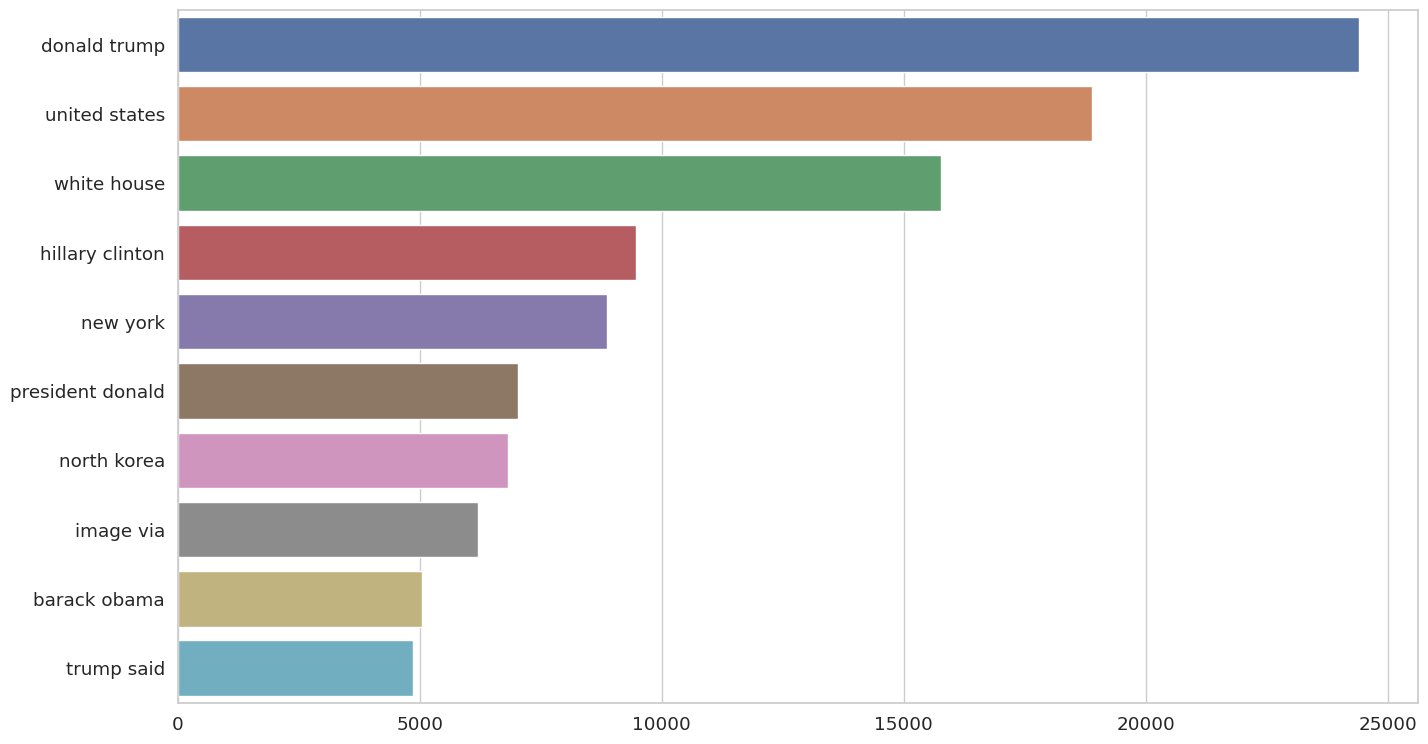

In [ ]:
plt.figure(figsize = (16,9))
most_common_bi = get_top_text_ngrams(combined_df.statement,10,2)
most_common_bi = dict(most_common_bi)
sns.barplot(x=list(most_common_bi.values()),y=list(most_common_bi.keys()))

**Trigram Analysis**

<Axes: >

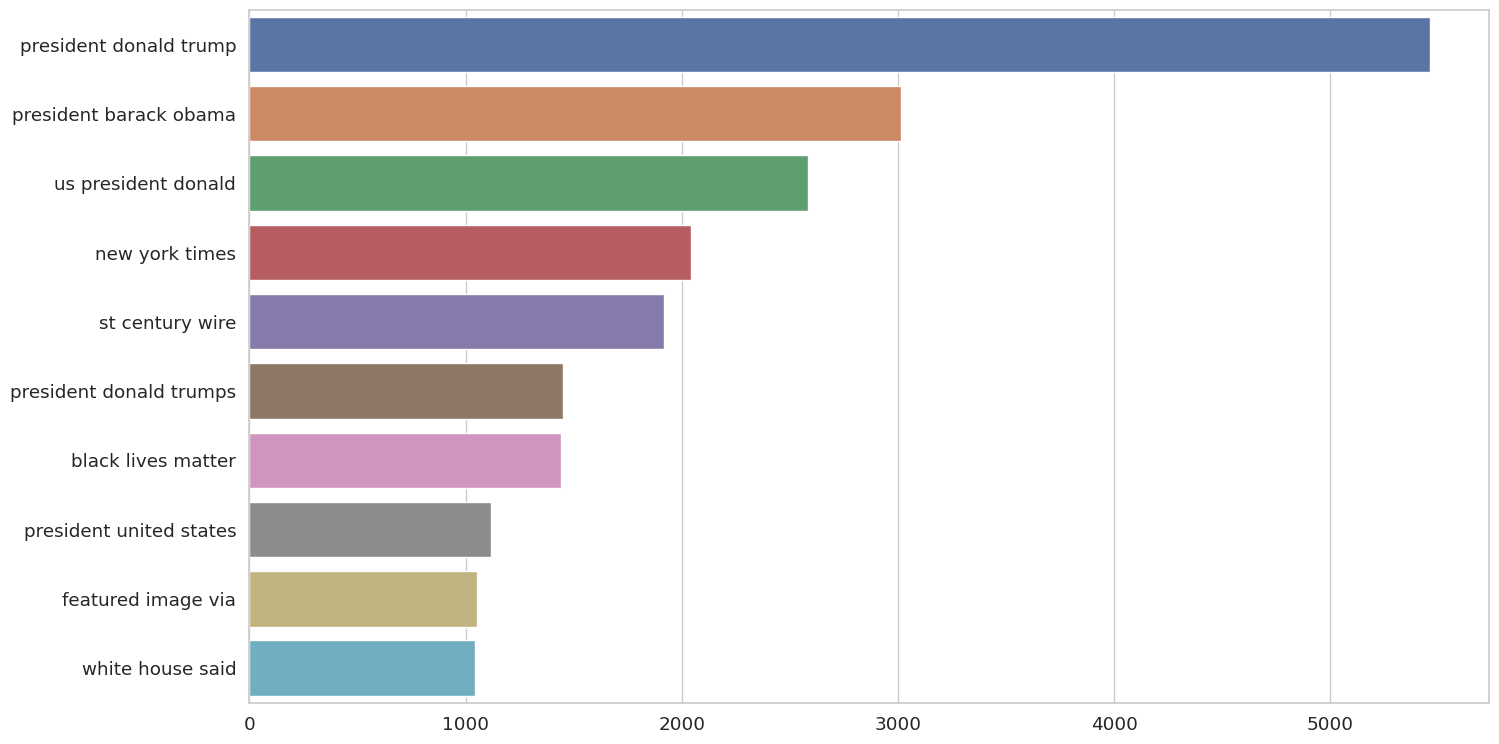

In [ ]:
plt.figure(figsize = (16,9))
most_common_tri = get_top_text_ngrams(combined_df.statement,10,3)
most_common_tri = dict(most_common_tri)
sns.barplot(x=list(most_common_tri.values()),y=list(most_common_tri.keys()))

**Splitting the data into 2 parts - training and testing data**

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(combined_df.statement,combined_df.verdict,random_state = 0)

In [ ]:
max_features = 20000
maxlen = 300


**Tokenizing Text -> Repsesenting each word by a number**

**Mapping of orginal word to number is preserved in word_index property of tokenizer**


In [ ]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(x_train)
tokenized_train = tokenizer.texts_to_sequences(x_train)
x_train = tf.keras.preprocessing.sequence.pad_sequences(tokenized_train, maxlen=maxlen)

In [ ]:
# Apply the denoise_text function to the 'text' column in the test DataFrame

# Convert the 'x_test' data to strings
x_test = x_test.astype(str)


x_test = x_test.apply(denoise_text)

tokenized_test = tokenizer.texts_to_sequences(x_test)
x_test = tf.keras.preprocessing.sequence.pad_sequences(tokenized_test, maxlen=maxlen)


# Introduction to GloVe
GloVe (Global Vectors for Word Representation) is an unsupervised learning algorithm for obtaining vector representations of words. These vectors, also known as embeddings, capture semantic relationships between words based on the co-occurrence patterns in a large corpus of text. GloVe was introduced by researchers at Stanford University, including Jeffrey Pennington, Richard Socher, and Christopher D. Manning.

Here are key aspects of GloVe:




* Objective: GloVe is designed to learn word representations that encode semantic information by considering the global context of word co-occurrences. The primary objective of GloVe is to learn vectors in such a way that the dot product of two word vectors reflects the words' co-occurrence probabilities.
* Training: GloVe is typically trained on a large corpus of text data. It builds a word–word co-occurrence matrix based on the frequency of word pairs appearing together in a context window. The optimization objective is to minimize the difference between the dot product of word vectors and the logarithm of the observed word co-occurrence probabilities.
* Vector Space Representation: The result of training is a dense vector space where words with similar meanings or relationships have vectors that are close in this space. The vectors capture semantic relationships, and arithmetic operations on vectors (e.g., vector addition and subtraction) can reveal interesting linguistic relationships (e.g., "king" - "man" + "woman" ≈ "queen").
* Advantages: GloVe often outperforms other word embedding methods due to its focus on global context and its ability to capture subtle semantic relationships between words.
* Pre-trained Models: Pre-trained GloVe embeddings are available for different dimensions and trained on massive text corpora. These pre-trained embeddings can be used in downstream natural language processing (NLP) tasks, saving the effort of training embeddings from scratch.


GloVe has become a popular choice in the NLP community for tasks such as text classification, sentiment analysis, and machine translation, among others. Its ability to capture semantic relationships has contributed to its widespread adoption in various applications.

**Source Credits - https://towardsdatascience.com/light-on-math-ml-intuitive-guide-to-understanding-glove-embeddings-b13b4f19c010**

In [1]:
EMBEDDING_FILE = '/content/drive/MyDrive/data/glove.twitter.27B.100d.txt'

In [ ]:
def get_coefs(word, *arr):
    return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open(EMBEDDING_FILE))

In [ ]:
all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
#change below line if computing normal stats is too slow
embedding_matrix = embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


**Some Model Parameters**

In [ ]:
batch_size = 512
epochs =
embed_size = 100

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

# TRAINING THE MODEL

In [ ]:
model = Sequential()
model.add(Embedding(max_features, output_dim=embed_size, weights=[embedding_matrix], input_length=maxlen, trainable=False))
model.add(LSTM(units=128, recurrent_dropout=0.25, dropout=0.25, kernel_regularizer=regularizers.l2(0.01)))  # Added L2 regularization
model.add(Dense(units=32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))  # Added L2 regularization
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=keras.optimizers.Adam(lr=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 100)          2000000   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2121409 (8.09 MB)
Trainable params: 121409 (474.25 KB)
Non-trainable params: 2000000 (7.63 MB)
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train, batch_size=batch_size, validation_data=(x_test, y_test), epochs=epochs, callbacks=[learning_rate_reduction, early_stopping])

Epoch 1/10
97/97 [==============================] - 656s 7s/step - loss: 1.3024 - accuracy: 0.7758 - val_loss: 0.5967 - val_accuracy: 0.8306 - lr: 0.0010
Epoch 2/10
97/97 [==============================] - 654s 7s/step - loss: 0.4962 - accuracy: 0.8229 - val_loss: 0.4165 - val_accuracy: 0.8366 - lr: 0.0010
Epoch 3/10
97/97 [==============================] - 657s 7s/step - loss: 0.3972 - accuracy: 0.8332 - val_loss: 0.3640 - val_accuracy: 0.8455 - lr: 0.0010
Epoch 4/10
97/97 [==============================] - 663s 7s/step - loss: 0.3814 - accuracy: 0.8339 - val_loss: 0.3900 - val_accuracy: 0.8364 - lr: 0.0010
Epoch 5/10
97/97 [==============================] - ETA: 0s - loss: 0.3796 - accuracy: 0.8343
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
97/97 [==============================] - 664s 7s/step - loss: 0.3796 - accuracy: 0.8343 - val_loss: 0.3768 - val_accuracy: 0.8346 - lr: 0.0010
Epoch 6/10
97/97 [==============================] - 667s 7s/step - loss

# ANALYSIS AFTER TRAINING OF MODEL

In [ ]:
print("Accuracy of the model on Training Data is - " , model.evaluate(x_train,y_train)[1]*100 , "%")
print("Accuracy of the model on Testing Data is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

1549/1549 [==============================] - 229s 147ms/step - loss: 0.2889 - accuracy: 0.8681
Accuracy of the model on Training Data is -  86.80986166000366 %
517/517 [==============================] - 73s 141ms/step - loss: 0.2919 - accuracy: 0.8653
Accuracy of the model on Testing Data is -  86.52576804161072 %


* Training Phase:
The training is performed in batches (steps) with a total of 1549 batches.
Each batch takes approximately 229 seconds (or 3.82 minutes) to complete.
The loss on the training set is decreasing, which is a positive sign.
The accuracy on the training set is gradually improving and has reached 86.81%.
* Testing (or Evaluation) Phase:
The model is evaluated on a separate dataset (testing data) that wasn't used during training.
The evaluation is done in batches, with a total of 517 batches.
Each batch takes approximately 73 seconds to complete.
The loss on the testing set is 0.2919, and the accuracy is 86.53%.
* Interpretation:
The decreasing loss during training suggests that the model is learning and improving its predictions.
The accuracy on both the training and testing sets is comparable, indicating that the model generalizes well to unseen data (it doesn't overfit the training data).
An accuracy of around 86-87% is achieved on the testing set, which is a measure of how well the model performs on new, previously unseen data.
* Next Steps:
These results are encouraging, but further analysis might involve examining other metrics, such as precision, recall, and F1 score, depending on the nature of the problem (classification, regression, etc.).

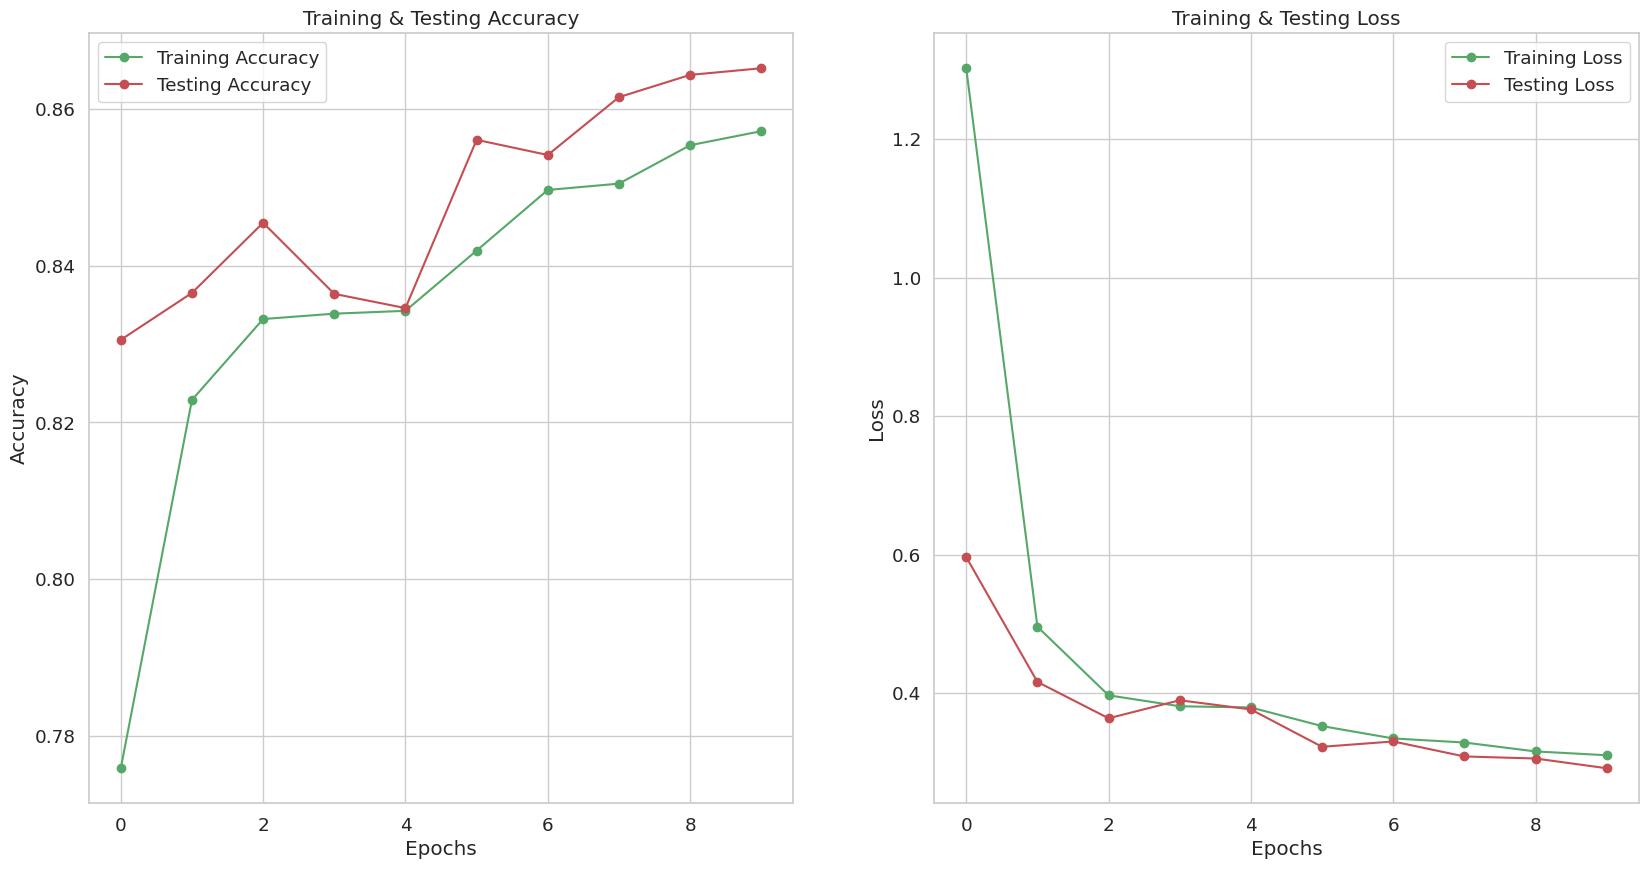

In [ ]:

epochs = [i for i in range(10)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Testing Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Testing Loss')
ax[1].set_title('Training & Testing Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

There shows there the model is well balances as it's neither overfitting nor undefitting

In [ ]:
# Use model.predict to get predicted probabilities
predicted_probabilities = model.predict(x_test)

# Find the class with the highest probability for each sample
predicted_classes = (predicted_probabilities > 0.5).astype(int)

# Display the predicted classes for the first 5 samples
print(predicted_classes[:5])


517/517 [==============================] - 81s 157ms/step
[[1]
 [1]
 [1]
 [0]
 [0]]


In [ ]:
# Use model.predict to get predicted probabilities
predicted_probabilities = model.predict(x_test)

# Define a threshold (e.g., 0.5)
threshold = 0.5

# Map predicted probabilities to class labels (True or False)
predicted_classes = (predicted_probabilities > threshold).astype(int)
predicted_labels = ['True' if prediction == 1 else 'False' for prediction in predicted_classes]

# Print the predicted probabilities and labels for the first 5 samples
for i in range(5):
    print(f"Sample {i + 1}:")
    print(f"Predicted Probability (as percentage): {predicted_probabilities[i][0] * 100:.2f}%")
    print(f"Predicted Label: {predicted_labels[i]}")
    print()


517/517 [==============================] - 73s 142ms/step
Sample 1:
Predicted Probability (as percentage): 99.02%
Predicted Label: True

Sample 2:
Predicted Probability (as percentage): 55.59%
Predicted Label: True

Sample 3:
Predicted Probability (as percentage): 97.28%
Predicted Label: True

Sample 4:
Predicted Probability (as percentage): 1.81%
Predicted Label: False

Sample 5:
Predicted Probability (as percentage): 0.44%
Predicted Label: False



In [ ]:
print(classification_report(y_test, predicted_classes, target_names = ['True','False']))

              precision    recall  f1-score   support

        True       0.89      0.86      0.87      8865
       False       0.84      0.88      0.86      7648

    accuracy                           0.87     16513
   macro avg       0.86      0.87      0.86     16513
weighted avg       0.87      0.87      0.87     16513



Let's break down the results:

* Precision: Precision measures the accuracy of positive
predictions. For the "True" class, it's 0.89, which means that 89% of the instances predicted as "True" were actually "True." For the "False" class, it's 0.84, meaning that 84% of the instances predicted as "False" were indeed "False."

* Recall: Recall measures the ability of the model to correctly identify all relevant instances. For the "True" class, it's 0.86, indicating that the model correctly identified 86% of the actual "True" instances. For the "False" class, it's 0.88, meaning that 88% of the actual "False" instances were correctly identified.

* F1-Score: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. For the "True" class, it's 0.87, and for the "False" class, it's 0.86.

These metrics indicate the model has a reasonably good balance between precision and recall for both classes.



In [ ]:
cm = confusion_matrix(y_test,predicted_classes)
cm

array([[7586, 1279],
       [ 946, 6702]])

he confusion matrix provides a detailed breakdown of the model's performance in terms of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN). In the context of your binary classification task:

* True Positives (TP): 6,702 instances were correctly predicted as "True."
* True Negatives (TN): 7,586 instances were correctly predicted as "False."
* False Positives (FP): 1,279 instances were incorrectly predicted as "True" when they were actually "False."
* False Negatives (FN): 946 instances were incorrectly predicted as "False" when they were actually "True."

These values provide a more granular view of the model's performance. It seems the model is doing well in terms of both true positives and true negatives, with a relatively low number of false positives and false negatives.




In [ ]:
cm = pd.DataFrame(cm , index = ['False','True'] , columns = ['False','True'])

Text(88.25, 0.5, 'Actual')

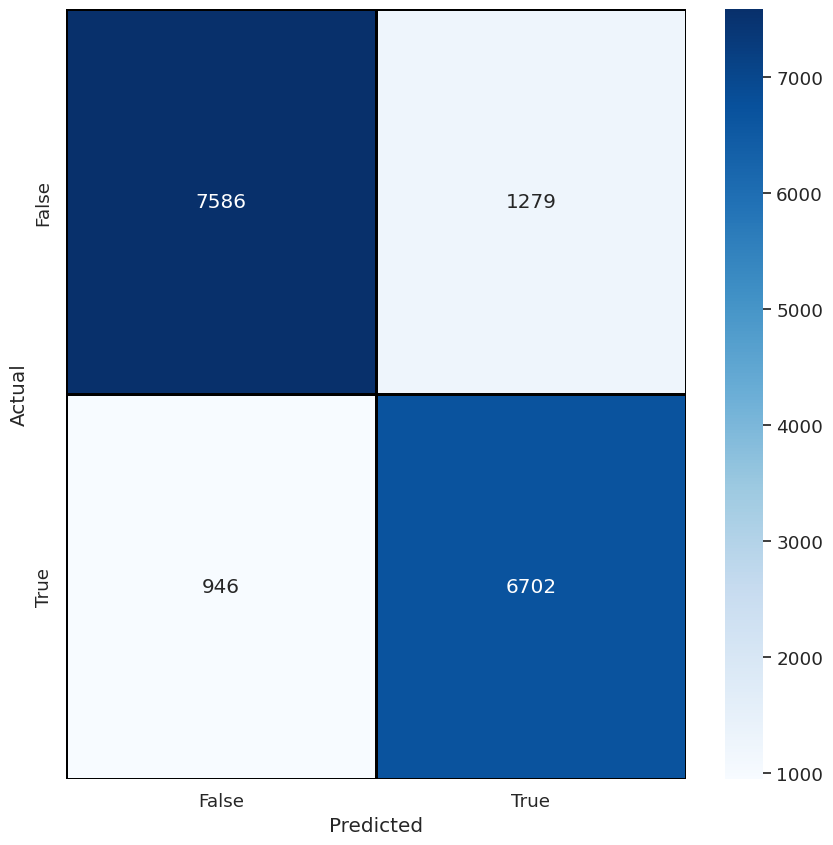

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['False','True'] , yticklabels = ['False','True'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [ ]:
model.save('/content/drive/MyDrive/models/cvs.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Testing the trained model on unseen data , where by a user inputs a statement its cleaned then  passed to the model which then gives an output

In [ ]:
# Load the pre-trained model
model = keras.models.load_model('/content/drive/MyDrive/models/cvs.h5')

# Define preprocessing functions
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def remove_text_before_sentences(text):
    text = re.sub(r'^[A-Z]+\s*-\s*', '', text)
    return text

def remove_words_in_parentheses(text):
    return re.sub(r'\([^)]*\)', '', text)

def remove_dashes(text):
    return text.replace('-', '')

def remove_symbols(text):
    pattern = r'[^A-Za-z0-9\s]'
    return re.sub(pattern, '', text)

def denoise_text(text):
    text = strip_html(text)
    text = remove_text_before_sentences(text)
    text = remove_words_in_parentheses(text)
    text = remove_dashes(text)
    text = remove_symbols(text)
    return text

# Tokenizer settings
max_features = 20000
maxlen = 300
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=max_features)

# Sample user input
user_input = input("Enter the text to classify: ")

# Preprocess user input
cleaned_input = denoise_text(user_input)

# Tokenize and pad the input
tokenizer.fit_on_texts([cleaned_input])
sequences = tokenizer.texts_to_sequences([cleaned_input])
input_data = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=maxlen)

# Make a prediction
predicted_probability = model.predict(input_data)
threshold = 0.5  # Adjust the threshold as needed
predicted_label = "True" if predicted_probability >= threshold else "False"

# Print the prediction
print("Predicted Probability (as percentage): {:.2%}".format(predicted_probability[0][0]))
print("Predicted Label:", predicted_label)


Enter the text to classify: Charcoal activated tablets counteract date rape drugs
1/1 [==============================] - 0s 276ms/step
Predicted Probability (as percentage): 49.81%
Predicted Label: False
